In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('data_decision_tree_bt.csv')
df.head(5)

,TT,DoHaiLong,LoaiKhachHang,Tuoi,LoaiHinh,DoTrePhut,GheNgoi,ThucAn,GateLocation,DichVuGuiXe,BauKhongKhiTranDau,ChatLuongTranDau,TraiNghiemDatVeOnline,ChatLuongCacDichVuDiKem,DoAnToan,ThoiTiet,SuSachSe,FanDoiNha,ThietKeLoiDi
0,0,Không Hài Lòng,KH Bình Thường,29,Đi Cùng Gia Đình/Bạn Bè,15.0,5,5,4,5,2,5,1,5,5,4,5,4,5
1,1,Không Hài Lòng,KH Trung Thành,44,Đi Cùng Gia Đình/Bạn Bè,0.0,4,5,5,3,1,4,3,4,3,3,2,3,5
2,2,Hài Lòng,KH Trung Thành,48,Đi Cùng Gia Đình/Bạn Bè,0.0,5,2,1,4,2,5,4,5,4,4,4,4,3
3,3,Hài Lòng,KH Bình Thường,45,Đi Cùng Gia Đình/Bạn Bè,0.0,5,5,4,3,2,4,3,5,5,5,5,5,3
4,4,Không Hài Lòng,KH Trung Thành,49,Đi Cá Nhân,0.0,4,4,2,4,1,5,4,5,4,1,4,2,4


In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126894 entries, 0 to 127281
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TT                       126894 non-null  int64  
 1   DoHaiLong                126894 non-null  object 
 2   LoaiKhachHang            126894 non-null  object 
 3   Tuoi                     126894 non-null  int64  
 4   LoaiHinh                 126894 non-null  object 
 5   DoTrePhut                126894 non-null  float64
 6   GheNgoi                  126894 non-null  int64  
 7   ThucAn                   126894 non-null  int64  
 8   GateLocation             126894 non-null  int64  
 9   DichVuGuiXe              126894 non-null  int64  
 10  BauKhongKhiTranDau       126894 non-null  int64  
 11  ChatLuongTranDau         126894 non-null  int64  
 12  TraiNghiemDatVeOnline    126894 non-null  int64  
 13  ChatLuongCacDichVuDiKem  126894 non-null  int64  
 14  DoAnToan 

In [9]:
df['DoHaiLong'].value_counts()

DoHaiLong
Hài Lòng          69478
Không Hài Lòng    57416
Name: count, dtype: int64

In [10]:
df_new = df.copy()
df_new['DoHaiLong'] = (df_new['DoHaiLong'] == 'Hài Lòng').astype(int)
df_new.head(5)

,TT,DoHaiLong,LoaiKhachHang,Tuoi,LoaiHinh,DoTrePhut,GheNgoi,ThucAn,GateLocation,DichVuGuiXe,BauKhongKhiTranDau,ChatLuongTranDau,TraiNghiemDatVeOnline,ChatLuongCacDichVuDiKem,DoAnToan,ThoiTiet,SuSachSe,FanDoiNha,ThietKeLoiDi
0,0,0,KH Bình Thường,29,Đi Cùng Gia Đình/Bạn Bè,15.0,5,5,4,5,2,5,1,5,5,4,5,4,5
1,1,0,KH Trung Thành,44,Đi Cùng Gia Đình/Bạn Bè,0.0,4,5,5,3,1,4,3,4,3,3,2,3,5
2,2,1,KH Trung Thành,48,Đi Cùng Gia Đình/Bạn Bè,0.0,5,2,1,4,2,5,4,5,4,4,4,4,3
3,3,1,KH Bình Thường,45,Đi Cùng Gia Đình/Bạn Bè,0.0,5,5,4,3,2,4,3,5,5,5,5,5,3
4,4,0,KH Trung Thành,49,Đi Cá Nhân,0.0,4,4,2,4,1,5,4,5,4,1,4,2,4


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_new['LoaiKhachHang'] = encoder.fit_transform(df_new['LoaiKhachHang'])
df_new['LoaiHinh'] = encoder.fit_transform(df_new['LoaiHinh'])

df_new.head(5)

,TT,DoHaiLong,LoaiKhachHang,Tuoi,LoaiHinh,DoTrePhut,GheNgoi,ThucAn,GateLocation,DichVuGuiXe,BauKhongKhiTranDau,ChatLuongTranDau,TraiNghiemDatVeOnline,ChatLuongCacDichVuDiKem,DoAnToan,ThoiTiet,SuSachSe,FanDoiNha,ThietKeLoiDi
0,0,0,0,29,1,15.0,5,5,4,5,2,5,1,5,5,4,5,4,5
1,1,0,1,44,1,0.0,4,5,5,3,1,4,3,4,3,3,2,3,5
2,2,1,1,48,1,0.0,5,2,1,4,2,5,4,5,4,4,4,4,3
3,3,1,0,45,1,0.0,5,5,4,3,2,4,3,5,5,5,5,5,3
4,4,0,1,49,0,0.0,4,4,2,4,1,5,4,5,4,1,4,2,4


In [12]:
df_new = df_new.drop('TT', axis=1)
df_new.head(5)

,DoHaiLong,LoaiKhachHang,Tuoi,LoaiHinh,DoTrePhut,GheNgoi,ThucAn,GateLocation,DichVuGuiXe,BauKhongKhiTranDau,ChatLuongTranDau,TraiNghiemDatVeOnline,ChatLuongCacDichVuDiKem,DoAnToan,ThoiTiet,SuSachSe,FanDoiNha,ThietKeLoiDi
0,0,0,29,1,15.0,5,5,4,5,2,5,1,5,5,4,5,4,5
1,0,1,44,1,0.0,4,5,5,3,1,4,3,4,3,3,2,3,5
2,1,1,48,1,0.0,5,2,1,4,2,5,4,5,4,4,4,4,3
3,1,0,45,1,0.0,5,5,4,3,2,4,3,5,5,5,5,5,3
4,0,1,49,0,0.0,4,4,2,4,1,5,4,5,4,1,4,2,4


In [13]:
Y = df_new['DoHaiLong']
X = df_new.drop('DoHaiLong', axis=1)
features = X.columns.tolist()
print(len(features))
print(features)

17
['LoaiKhachHang', 'Tuoi', 'LoaiHinh', 'DoTrePhut', 'GheNgoi', 'ThucAn', 'GateLocation', 'DichVuGuiXe', 'BauKhongKhiTranDau', 'ChatLuongTranDau', 'TraiNghiemDatVeOnline', 'ChatLuongCacDichVuDiKem', 'DoAnToan', 'ThoiTiet', 'SuSachSe', 'FanDoiNha', 'ThietKeLoiDi']


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(101515, 17) (25379, 17) (101515,) (25379,)


In [11]:
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, Y_train)

train_accuracy = tree_full.score(X_train, Y_train)
test_accuracy = tree_full.score(X_test, Y_test)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9996355218440625
Test Accuracy: 0.8907364356357619


In [12]:
print(f'Tree depth: {tree_full.get_depth()}')
print(f'Number of leaves: {tree_full.get_n_leaves()}')

Tree depth: 35
Number of leaves: 9883


In [13]:
prunning_path = tree_full.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = prunning_path.ccp_alphas

print(f'Number of alphas: {len(ccp_alphas)}')
print(f'Min alpha: {ccp_alphas.min()}, Max alpha: {ccp_alphas.max()}')

Number of alphas: 3943
Min alpha: 0.0, Max alpha: 0.09050214189143391


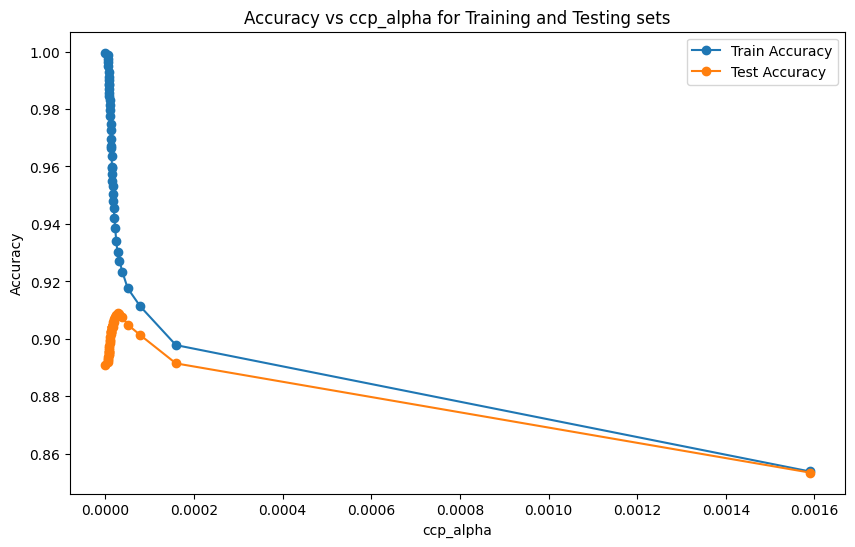

In [14]:
n_alphas = 40
alphas = ccp_alphas[::max(1, len(ccp_alphas)//n_alphas)]    # get 40 alphas samples

train_scores = []
test_scores = []

for a in alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=a)
    tree.fit(X_train, Y_train)
    train_scores.append(tree.score(X_train, Y_train))
    test_scores.append(tree.score(X_test, Y_test))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(alphas, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha for Training and Testing sets')
plt.legend()
plt.show()

In [18]:
max_test_accuracy = max(test_scores)
best_alpha = alphas[test_scores.index(max_test_accuracy)]
print(f'Best alpha: {best_alpha:.5f}')
print(f'Max Test Accuracy: {max_test_accuracy}')
print(f'Train Accuracy at Best Alpha: {train_scores[test_scores.index(max_test_accuracy)]}')
print(f'Tree depth at Best Alpha: {DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha).fit(X_train, Y_train).get_depth()}')

Best alpha: 0.00003
Max Test Accuracy: 0.9090586705543954
Train Accuracy at Best Alpha: 0.9300398955819337
Tree depth at Best Alpha: 24


In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)
rf_train_accuracy = rf.score(X_train, Y_train)
rf_test_accuracy = rf.score(X_test, Y_test)
print(f"Random Forest Train Accuracy: {rf_train_accuracy}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy}")

Random Forest Train Accuracy: 0.9996355218440625
Random Forest Test Accuracy: 0.9187517238661885


In [20]:
rf_oob = RandomForestClassifier(random_state=42, 
                                oob_score=True,
                                n_estimators=100)
rf_oob.fit(X_train, Y_train)
print(f"Random Forest OOB Score: {rf_oob.oob_score_}")
print(f"Random Forest Test Accuracy: {rf_oob.score(X_test, Y_test)}")
print(f"Random Forest Train Accuracy: {rf_oob.score(X_train, Y_train)}")

Random Forest OOB Score: 0.9209771954883514
Random Forest Test Accuracy: 0.9187517238661885
Random Forest Train Accuracy: 0.9996355218440625


In [21]:
oob_errors = []
n_estimators_range = range(10, 201, 10)

for n in n_estimators_range:
    rf_temp = RandomForestClassifier(random_state=42,
                                     oob_score=True,
                                     n_estimators=n)
    rf_temp.fit(X_train, Y_train)
    oob_error = 1 - rf_temp.oob_score_
    oob_errors.append(oob_error)

/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/ensemble/_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/tungdt/Library/Python/3.13/lib/python/site-packages/sklearn/ensemble/_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


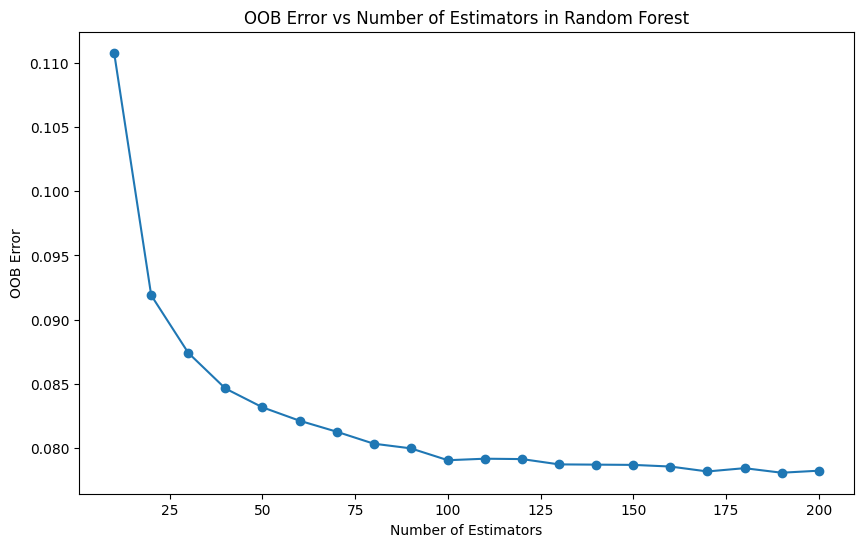

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, oob_errors, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('OOB Error')
plt.title('OOB Error vs Number of Estimators in Random Forest')
plt.show()

In [15]:
import shap as sp
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

shape_explainer = sp.TreeExplainer(rf)

X_train_sample = X_train.sample(n=500, random_state=42)
shap_values = shape_explainer.shap_values(X_train_sample)

In [22]:
print(shap_values.shape)

(500, 17, 2)


In [ ]:
shap_values = [shap_values[:, :, i] for i in range(shap_values.shape[2])]

In [25]:
print(len(shap_values))

2


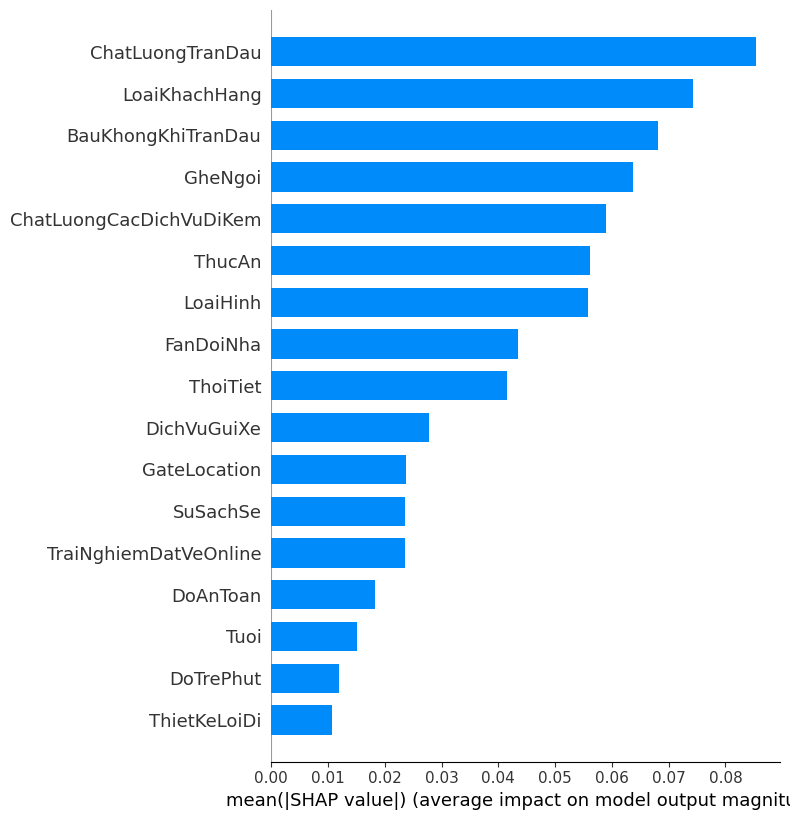

In [26]:
plt.figure(figsize=(10, 6))
sp.summary_plot(shap_values[0], X_train_sample, plot_type="bar", show=False)
plt.show()

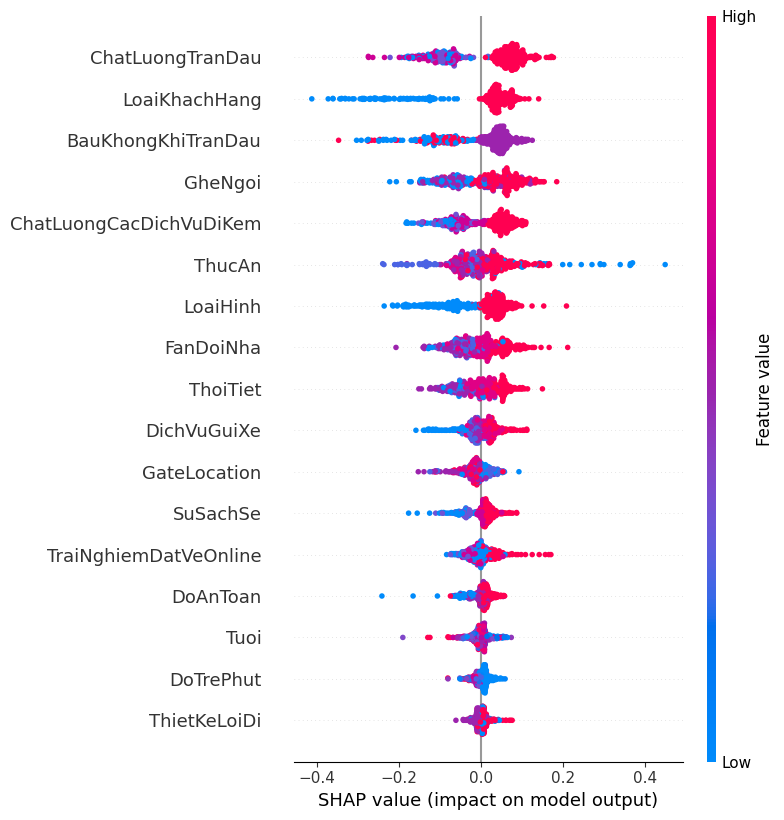

In [30]:
plt.figure(figsize=(10, 6))
sp.summary_plot(shap_values[1], X_train_sample, show=False)
plt.show()

In [31]:
from sklearn.ensemble import IsolationForest

In [32]:
iso_forest = IsolationForest(contamination=0.01, random_state=42, n_estimators=100)

iso_forest.fit(X_train)

n_anomalies = iso_forest.predict(X_train).tolist().count(-1)
print(f'Number of detected anomalies in training set: {n_anomalies}')

Number of detected anomalies in training set: 1016


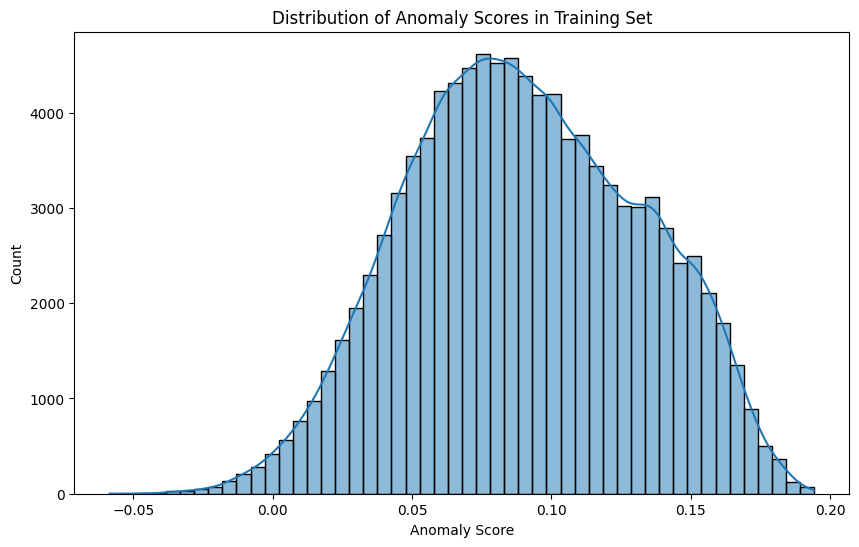

In [33]:
anomaly_scores = iso_forest.decision_function(X_train)

plt.figure(figsize=(10, 6))
sns.histplot(anomaly_scores, bins=50, kde=True)
plt.xlabel('Anomaly Score')
plt.title('Distribution of Anomaly Scores in Training Set')
plt.show()

In [34]:
anomaly_pred  = iso_forest.fit_predict(X_train)

In [35]:
print(anomaly_pred[:5])

[1 1 1 1 1]


In [36]:
anomaly_bool = anomaly_pred == -1
print(anomaly_bool[:5])

[False False False False False]


In [ ]:
do_tre_mean_anomaly = X_train[anomaly_bool]['DoTrePhut'].mean()
print(do_tre_mean_anomaly)

20.918307086614174


In [39]:
do_tre_mean_normal = X_train[~anomaly_bool]['DoTrePhut'].mean()
print(do_tre_mean_normal)

4.8173414660842395
